In [1]:
import pandas as pd
import exploratory_analysis
import preprocessing
import to_display_data 
import  evaluation 
import to_compute_model
import to_resample
from joblib import dump,load
import numpy as np
import to_concatenate
from ipywidgets import interact
import matplotlib.pyplot as plt

C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data=exploratory_analysis.import_data(r"C:\Users\Ninette HOUKPONOU\Repertoire_python\Memoire\new_data\full_data.csv")

In [3]:
df=data.copy()

In [4]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [7]:
df=df[["age","bmi","avg_glucose_level","stroke"]]

In [6]:
df.head()

,age,bmi,avg_glucose_level,stroke
0,67.0,36.6,228.69,1
1,80.0,32.5,105.92,1
2,49.0,34.4,171.23,1
3,79.0,24.0,174.12,1
4,81.0,29.0,186.21,1


# Split

In [15]:
x_train,x_test, y_train, y_test=preprocessing.separation_of_train_test(df,"stroke",size_=0.3)

# Standardization 

In [16]:
standar_train,scaler=preprocessing.to_standardized(x_train)
standar_test=scaler.transform(x_test)
standar_test=pd.DataFrame(standar_test,columns=standar_train.columns)

In [17]:
standar_train.head()

,age,bmi,avg_glucose_level
0,0.353027,0.255747,0.122649
1,0.157715,0.293103,0.128198
2,0.682617,0.528736,0.145551
3,0.365234,0.522989,0.187594
4,0.853516,0.425287,0.166337


In [18]:
standar_test.head()

,age,bmi,avg_glucose_level
0,0.597168,0.899425,0.567250
1,0.877930,0.545977,0.135299
2,0.487305,0.701149,0.326185
3,0.096680,0.135057,0.162011
4,0.475098,0.752874,0.291149


In [38]:
model_resume=exploratory_analysis.import_data(r"C:\Users\Ninette HOUKPONOU\Repertoire_python\Memoire\new_data\model_resume.csv")

# Modelization

In [22]:
model=to_compute_model.compute_model("rdf",x_train,y_train)
sum_up=evaluation.evaluation_of_model(model,x_test,y_test,"RandomForest_18_07",model_resume)

Do you want to enter the params. Y/Nn
              precision    recall  f1-score   support

           0       0.99      0.72      0.83      1421
           1       0.13      0.82      0.23        74

    accuracy                           0.73      1495
   macro avg       0.56      0.77      0.53      1495
weighted avg       0.95      0.73      0.80      1495



In [24]:
dump(value=model,filename="rdf_num_18_07.pkl")
loaded_rdf_num=load(filename="rdf_num_18_07.pkl")

In [25]:
x_test_resampled,y_test_resampled,resampler=to_resample.resampling_data(x_test,y_test,"SMOTE")

In [27]:
sum_up=evaluation.evaluation_of_model(loaded_rdf_num,x_test_resampled,y_test_resampled,"Random_data_smoted_18_07",model_resume)

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1421
           1       0.76      0.87      0.81      1421

    accuracy                           0.80      2842
   macro avg       0.80      0.80      0.79      2842
weighted avg       0.80      0.80      0.79      2842



In [33]:
def plot_dependencing(model,x_train,model_name):
    """
    model: estimator 
    x_train : pd.DataFrame
    
    model_name : str (the name of model)
    """
    from sklearn.inspection import PartialDependenceDisplay
    fig,ax=plt.subplots(figsize=(12,6))
    ax.set_title(model_name)
    plot_model=PartialDependenceDisplay.from_estimator(model,x_train,x_train.columns, ax=ax)
    plt.show()

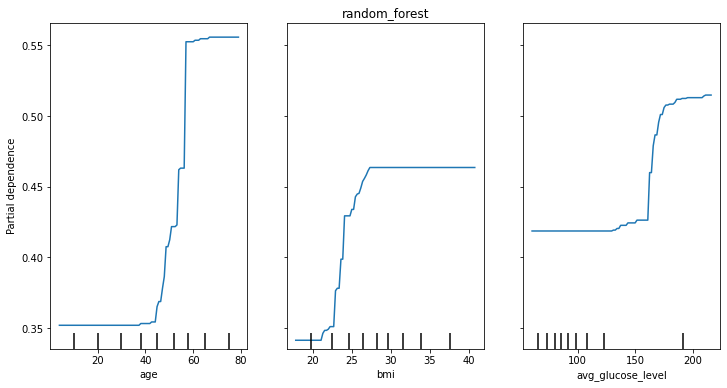

In [34]:
plot_dependencing(loaded_rdf_num,x_train,"random_forest")

# Model with avg glucose alone

In [39]:
avg=data[["avg_glucose_level","stroke"]]

In [40]:
avg_train,avg_test,y_train,y_test=preprocessing.separation_of_train_test(avg,"stroke",size_=0.3)

In [42]:
model=to_compute_model.compute_model("rdf",avg_train,y_train)
sum_up=evaluation.evaluation_of_model(model,avg_test,y_test,"RandomForest_with_avg_18_07",model_resume)

Do you want to enter the params. Y/Nn
              precision    recall  f1-score   support

           0       0.97      0.89      0.92      1421
           1       0.16      0.42      0.23        74

    accuracy                           0.86      1495
   macro avg       0.56      0.65      0.58      1495
weighted avg       0.93      0.86      0.89      1495



In [46]:
dump(value=model,filename="rdf_avg_18_07.pkl")
loaded_rdf_avg=load(filename="rdf_avg_18_07.pkl")

In [48]:
x_test_resampled,y_test_resampled,resampler=to_resample.resampling_data(avg_test,y_test,"SMOTE")

In [49]:
sum_up=evaluation.evaluation_of_model(loaded_rdf_avg,x_test_resampled,y_test_resampled,"Random_avg_smoted_18_07",model_resume)

              precision    recall  f1-score   support

           0       0.60      0.89      0.72      1421
           1       0.78      0.42      0.54      1421

    accuracy                           0.65      2842
   macro avg       0.69      0.65      0.63      2842
weighted avg       0.69      0.65      0.63      2842



In [ ]:
# Model with num